In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('NAS.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4253 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj_Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 232.7+ KB


In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Convert date to datetime
dataset.iloc[:, 0]= pd.to_datetime(dataset.iloc[:, 0]) 
#Setting date as index
#dataset.set_index('Date',inplace=True)                   
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4218 non-null   datetime64[ns]
 1   Open       4218 non-null   float64       
 2   High       4218 non-null   float64       
 3   Low        4218 non-null   float64       
 4   Close      4218 non-null   float64       
 5   Adj_Close  4218 non-null   float64       
 6   Volume     4218 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 263.6 KB


In [6]:
#dataset = dataset[['Adj_Close']]
dataset=dataset[['Date','Adj_Close',]]
dataset.head()

,Date,Adj_Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
7,2003-12-29,17.254400


In [7]:
dataset.tail()

,Date,Adj_Close
4248,2020-10-12,0.6768
4249,2020-10-13,0.6006
4250,2020-10-14,0.6260
4251,2020-10-15,0.6050
4252,2020-10-16,0.6106


In [8]:
forecast_out = 30
dataset['Prediction'] = dataset[['Adj_Close']].shift(-forecast_out)
dataset.tail()

,Date,Adj_Close,Prediction
4248,2020-10-12,0.6768,NaN
4249,2020-10-13,0.6006,NaN
4250,2020-10-14,0.6260,NaN
4251,2020-10-15,0.6050,NaN
4252,2020-10-16,0.6106,NaN


In [9]:
#x = np.array(dataset.drop(['Prediction'],1))
x = np.array(dataset.drop(['Prediction','Date'],1))
X = x[:-forecast_out]
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.06    ]
 [ 1.0055  ]
 [ 1.125   ]]


In [10]:
y = np.array(dataset['Prediction'])
y = y[:-forecast_out]
print(y)

[16.8545 16.9116 17.1401 ...  0.626   0.605   0.6106]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg = LinearRegression().fit(X, y)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_confidence = linreg.score(x_test, y_test)
print("linreg confidence: ", linreg_confidence)

linreg confidence:  0.9190126486202278


In [12]:
#x_forecast = np.array(dataset.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(dataset.drop(['Prediction','Date'],1))[-forecast_out:]
print(x_forecast)

[[1.0615]
 [1.088 ]
 [1.054 ]
 [1.042 ]
 [1.0425]
 [1.0445]
 [1.047 ]
 [1.0475]
 [1.0325]
 [1.0445]
 [1.014 ]
 [1.017 ]
 [1.    ]
 [0.955 ]
 [0.8674]
 [0.9148]
 [0.92  ]
 [0.94  ]
 [1.    ]
 [1.    ]
 [0.989 ]
 [0.99  ]
 [0.9226]
 [0.9178]
 [0.6964]
 [0.6768]
 [0.6006]
 [0.626 ]
 [0.605 ]
 [0.6106]]


In [13]:
linreg_prediction = linreg.predict(X)
#linreg = linreg.drop()

# Delete the "Area" column from the dataframe
#data = data.drop("Area", axis=1)

#print(linreg_prediction)
Adj_Close_arr = dataset.Adj_Close.to_numpy()
date_arr = dataset.Date.to_numpy()
Adj_Close_arr = np.delete(Adj_Close_arr,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
date_arr = np.delete(date_arr,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
len(Adj_Close_arr)

#arr = np.delete(arr, 2)
#print('Modified Numpy Array by deleting element at index position 2')
#print(arr)


4188

In [14]:
len(date_arr)

4188

In [15]:
type(dataset.Adj_Close.to_numpy())

numpy.ndarray

In [16]:
print(dataset.Prediction)

0       16.8545
1       16.9116
2       17.1401
3       16.7973
7       16.4545
         ...   
4248        NaN
4249        NaN
4250        NaN
4251        NaN
4252        NaN
Name: Prediction, Length: 4218, dtype: float64


In [17]:
len(dataset.Date)

4218

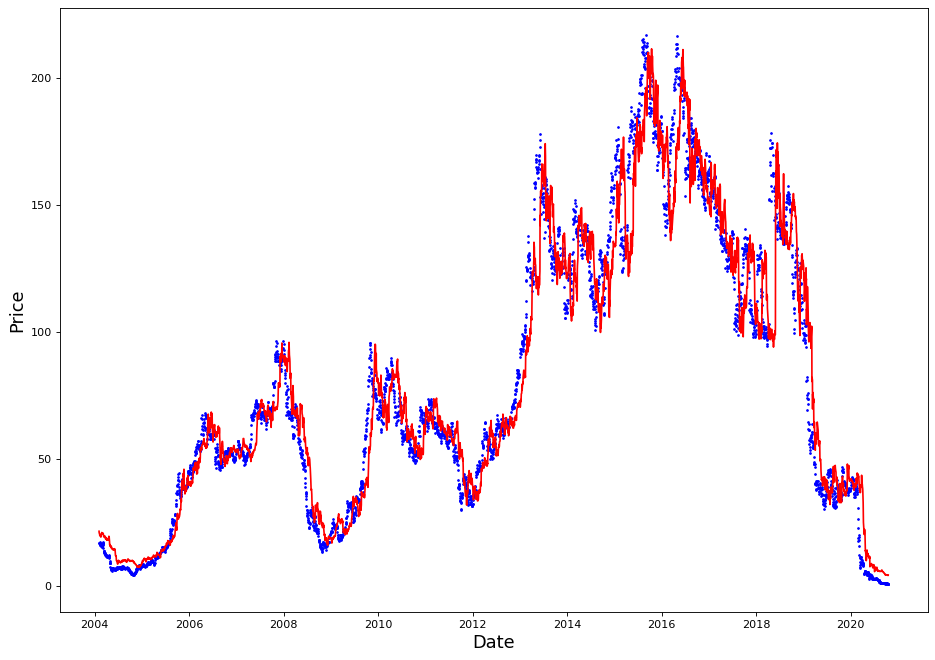

In [18]:
#dataset['x1'] = dataset.index
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Price',fontsize=16)
#Visual Represention of linear equation with Linear Regression
#plt.scatter(dataset.Date,dataset.Adj_Close,color='blue', s = 2)
plt.scatter(date_arr,Adj_Close_arr,color='blue', s = 2)
#plt.plot(dataset.Date,dataset.Prediction,color='red') 
plt.plot(date_arr,linreg_prediction,color='red')


In [17]:
#We've tried to make a forecast and train the data, but we're not sure what we've done wrong.
#We've tried a lot of different approaches without luck.
#This is our last try. Expected smoother line to predict the stock price and not the actual graph, when running predict on linreg_prediction = linreg.predict(X)